In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import torch
import numpy as np

from pathlib import Path
from dotenv import load_dotenv

import os

from scipy import ndimage
from yolov5.utils.plots import Annotator

from utils.yolo import get_teeth_ROI, crop_by_xyxy
from utils.edge import tooth_isolation

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

% matplotlib inline


In [2]:
model = torch.hub.load(r'..\YOLO', 'custom', path=r'..\YOLO\weights\8-bound.pt', source='local')
data_dir = '..' / Path(os.getenv('DATASET_DIR'))


YOLOv5  torch 1.12.0 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)



requirements: D:\Users\douli\anaconda3\envs\dentist-CV-main\Lib\site-packages\yolov5\requirements.txt not found, check failed.


Fusing layers... 
Model summary: 270 layers, 7041205 parameters, 0 gradients
Adding AutoShape... 


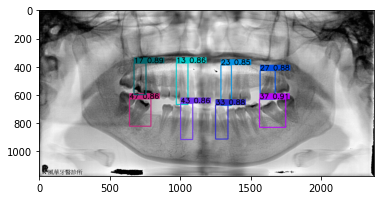

In [3]:
image_names = list(data_dir.glob('*008225.jpg'))

image_name = image_names[0]
filename = image_name.stem

results = model(image_name)
rendered_results = results.render()
results = model(image_name)

plt.imshow(1 - rendered_results[0])
plt.show()


In [4]:
teeth_roi = get_teeth_ROI(results)

split_teeth = teeth_roi['split_teeth']
teeth_roi = teeth_roi['images']

data = teeth_roi[filename]
teeth_region = {}


In [12]:
teeth_region[filename] = {}
for datum in data:
    flag = datum['flag']
    number = datum['number']
    im = datum['image']
    offset = datum['offset']
    tooth_position = datum['tooth_position']

    im_g = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

    isolation_data = tooth_isolation(im_g, flag=flag, filename=filename, tooth_position=tooth_position)

    region = isolation_data['crop_regions']

    teeth_region[filename][f'{flag}-{tooth_position}'] = region

teeth_region[filename][f'split_teeth'] = split_teeth[filename]




{'crop_regions': {}, 'angle': 14}


{'upper-left': [],
 'upper-middle': [12, 11, 21, 22],
 'upper-right': [24, 25, 26],
 'lower-left': [46, 45, 44],
 'lower-middle': [42, 41, 31, 32],
 'lower-right': [34, 35, 36],
 'split_teeth': ['37', '17', '33', '27', '43', '47', '13', '23']}

In [ ]:
results.image
